In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [74]:
AAPL_OB2 = pd.read_csv("./data/AAPL/AAPL_2019-01-02_24900000_57900000_orderbook_10.csv", header=None)
AAPL_M2 = pd.read_csv("./data/AAPL/AAPL_2019-01-02_24900000_57900000_message_10.csv", header=None)
AAPL_OB3 = pd.read_csv("./data/AAPL/AAPL_2019-01-03_24900000_57900000_orderbook_10.csv", header=None)
AAPL_M3 = pd.read_csv("./data/AAPL/AAPL_2019-01-03_24900000_57900000_message_10.csv", header=None)
AAPL_OB4 = pd.read_csv("./data/AAPL/AAPL_2019-01-04_24900000_57900000_orderbook_10.csv", header=None)
AAPL_M4 = pd.read_csv("./data/AAPL/AAPL_2019-01-04_24900000_57900000_message_10.csv", header=None)

/var/folders/lz/7z_hp6dd6q308wv0q5lw0zbr0000gn/T/ipykernel_91132/3999352889.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  AAPL_M2 = pd.read_csv("./data/AAPL/AAPL_2019-01-02_24900000_57900000_message_10.csv", header=None)
/var/folders/lz/7z_hp6dd6q308wv0q5lw0zbr0000gn/T/ipykernel_91132/3999352889.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  AAPL_M3 = pd.read_csv("./data/AAPL/AAPL_2019-01-03_24900000_57900000_message_10.csv", header=None)


In [75]:
OB_header = []
for i in range(1, AAPL_OB2.shape[1]//4 + 1):
    OB_header.append(f'ask_price_{i}')
    OB_header.append(f'ask_size_{i}')
    OB_header.append(f'bid_price_{i}')
    OB_header.append(f'bid_size_{i}')

AAPL_OB2.columns = OB_header
AAPL_OB3.columns = OB_header
AAPL_OB4.columns = OB_header
AAPL_OB2

,ask_price_1,ask_size_1,bid_price_1,bid_size_1,ask_price_2,ask_size_2,bid_price_2,bid_size_2,ask_price_3,ask_size_3,...,bid_price_8,bid_size_8,ask_price_9,ask_size_9,bid_price_9,bid_size_9,ask_price_10,ask_size_10,bid_price_10,bid_size_10
0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,...,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
1,9999999999,0,1250000,100,9999999999,0,-9999999999,0,9999999999,0,...,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
2,9999999999,0,1307400,1,9999999999,0,1250000,100,9999999999,0,...,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
3,9999999999,0,1307400,1,9999999999,0,1250000,100,9999999999,0,...,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
4,9999999999,0,1307400,1,9999999999,0,1250000,100,9999999999,0,...,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093399,1550000,250,1405500,10,1960000,15,1270000,1000,9999999999,0,...,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
1093400,1550000,250,1405500,10,9999999999,0,1270000,1000,9999999999,0,...,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
1093401,1550000,250,1270000,1000,9999999999,0,-9999999999,0,9999999999,0,...,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
1093402,1550000,250,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,...,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0


In [76]:
AAPL_M2 = AAPL_M2.iloc[:,:-1]
AAPL_M3 = AAPL_M3.iloc[:,:-1]
AAPL_M4 = AAPL_M4.iloc[:,:-1]

M_header = ['time_sec', 'event_type', 'order_ID',
            'size', 'price', 'direction']

AAPL_M2.columns = M_header
AAPL_M3.columns = M_header
AAPL_M4.columns = M_header

AAPL_M2

,time_sec,event_type,order_ID,size,price,direction
0,11316.013356,7,0,0,1,-1
1,14400.018599,1,21353,100,1250000,1
2,14400.030102,1,33673,1,1307400,1
3,14400.031059,1,34089,1,1174800,1
4,14400.032449,1,34685,100,960600,1
...,...,...,...,...,...,...
1093399,72000.071248,3,400904933,100,1078900,1
1093400,72000.071249,3,400856821,15,1960000,-1
1093401,72000.071259,3,401483589,10,1405500,1
1093402,72000.071264,3,400878905,1000,1270000,1


In [77]:
AAPL_M2['time_sec'] = pd.to_timedelta(AAPL_M2['time_sec'], unit='s')
AAPL_M3['time_sec'] = pd.to_timedelta(AAPL_M3['time_sec'], unit='s')
AAPL_M4['time_sec'] = pd.to_timedelta(AAPL_M4['time_sec'], unit='s')


# Set the index to time_sec
AAPL_M2.set_index('time_sec', inplace=True)
AAPL_M3.set_index('time_sec', inplace=True)
AAPL_M4.set_index('time_sec', inplace=True)

AAPL_M2['event_number'] = range(len(AAPL_M2))
AAPL_M3['event_number'] = range(len(AAPL_M3))
AAPL_M4['event_number'] = range(len(AAPL_M4))

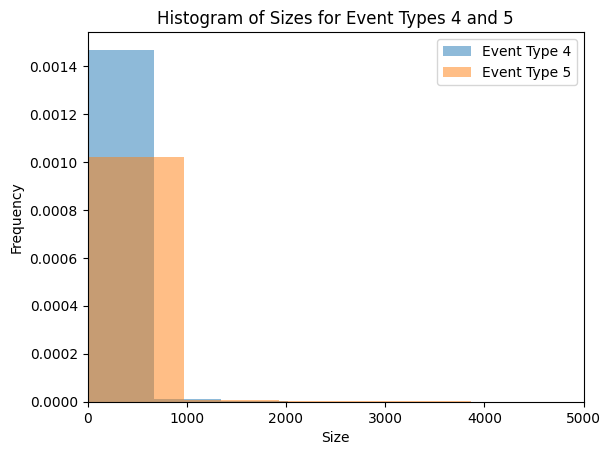

In [78]:
AAPL_M2_execute_size = AAPL_M2[(AAPL_M2['event_type'] == 4) | (AAPL_M2['event_type'] == 5)]

for event_type in [4, 5]:
    subset = AAPL_M2_execute_size[AAPL_M2_execute_size['event_type'] == event_type]
    plt.hist(subset['size'], bins=30, alpha=0.5, label=f'Event Type {event_type}', density=True)

plt.xlabel('Size')
plt.ylabel('Frequency')
plt.title('Histogram of Sizes for Event Types 4 and 5')
plt.xlim(0, 5000)
plt.legend(loc='upper right')
plt.show()

In [79]:
AAPL_M2[AAPL_M2['event_type']==4]['size'].sort_values()

time_sec
0 days 10:45:16.938908213        1
0 days 09:42:16.079409466        1
0 days 16:58:12.227354904        1
0 days 15:53:18.566064283        1
0 days 17:50:20.790170252        1
                             ...  
0 days 11:26:29.293954911    10879
0 days 15:21:20.721685675    12474
0 days 16:00:00.710825808    12651
0 days 16:00:00.710825808    15300
0 days 15:53:45.573129043    20213
Name: size, Length: 63459, dtype: int64

In [80]:
AAPL_exec_vis_size = list(AAPL_M2[AAPL_M2['event_type']==4]['size']) + list(AAPL_M3[AAPL_M3['event_type']==4]['size']) + list(AAPL_M4[AAPL_M4['event_type']==4]['size'])
AAPL_exec_hid_size = list(AAPL_M2[AAPL_M2['event_type']==5]['size']) + list(AAPL_M3[AAPL_M3['event_type']==5]['size']) + list(AAPL_M4[AAPL_M4['event_type']==5]['size'])

(0.0, 2000.0)

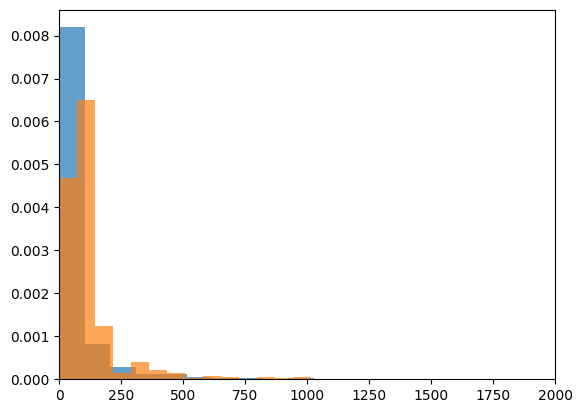

In [81]:
plt.hist(AAPL_exec_vis_size, bins=400, density=True, alpha=0.7)
plt.hist(AAPL_exec_hid_size, bins=400, density=True, alpha=0.7)
plt.xlim([0, 2000])

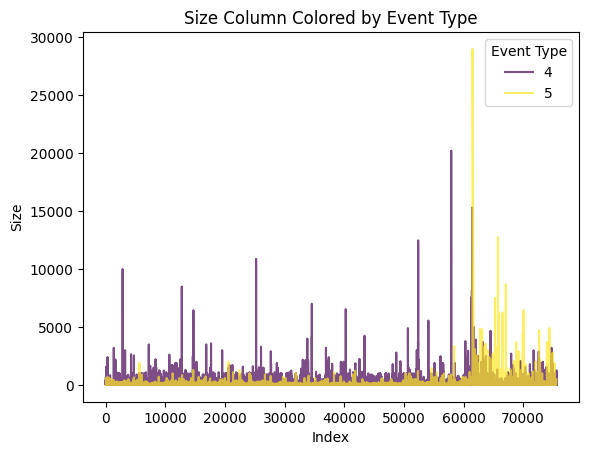

In [82]:
sns.lineplot(x=list(range(len(AAPL_M2_execute_size))), y='size', hue='event_type', palette='viridis', data=AAPL_M2_execute_size, alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Size')
plt.title('Size Column Colored by Event Type')
plt.legend(title='Event Type')
plt.show()

In [190]:
AAPL_OB

,ask_price_1,ask_size_1,bid_price_1,bid_size_1,ask_price_2,ask_size_2,bid_price_2,bid_size_2,ask_price_3,ask_size_3,bid_price_3,bid_size_3,ask_price_4,ask_size_4,bid_price_4,bid_size_4,ask_price_5,ask_size_5,bid_price_5,bid_size_5,ask_price_6,ask_size_6,bid_price_6,bid_size_6,ask_price_7,ask_size_7,bid_price_7,bid_size_7,ask_price_8,ask_size_8,bid_price_8,bid_size_8,ask_price_9,ask_size_9,bid_price_9,bid_size_9,ask_price_10,ask_size_10,bid_price_10,bid_size_10
time_sec,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-02 03:08:36.013356218,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
2019-01-02 04:00:00.018599456,9999999999,0,1250000,100,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
2019-01-02 04:00:00.030101712,9999999999,0,1307400,1,9999999999,0,1250000,100,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
2019-01-02 04:00:00.031059467,9999999999,0,1307400,1,9999999999,0,1250000,100,9999999999,0,1174800,1,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
2019-01-02 04:00:00.032449400,9999999999,0,1307400,1,9999999999,0,1250000,100,9999999999,0,1174800,1,9999999999,0,960600,100,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-04 20:00:00.066903237,9999999999,0,1480000,100,9999999999,0,1479900,1200,9999999999,0,1412100,7,9999999999,0,1239200,198,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
2019-01-04 20:00:00.066913568,9999999999,0,1480000,100,9999999999,0,1479900,1200,9999999999,0,1239200,198,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
2019-01-04 20:00:00.066937486,9999999999,0,1480000,100,9999999999,0,1479900,1200,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0


In [193]:
AAPL_M[AAPL_M['event_type']==4]

,event_type,order_ID,size,price,direction,event_number
time_sec,,,,,,
2019-01-02 04:00:30.483333390,4,115793,100,1538800,-1,34
2019-01-02 04:00:32.577833818,4,118753,400,1539000,1,37
2019-01-02 04:01:50.226889841,4,127061,10,1540000,1,87
2019-01-02 04:03:26.478472054,4,183741,100,1540100,1,167
2019-01-02 04:03:26.527421524,4,166005,100,1540000,1,170
...,...,...,...,...,...,...
2019-01-04 19:49:50.582680484,4,402573065,94,1483100,1,1178078
2019-01-04 19:49:50.582680484,4,402571045,6,1482400,1,1178079
2019-01-04 19:55:39.598893533,4,402579749,200,1483000,-1,1178088


In [83]:
AAPL_M2[AAPL_M2.index.duplicated(keep=False)][10:50]


,event_type,order_ID,size,price,direction,event_number
time_sec,,,,,,
0 days 04:17:19.732863546,5,0,490,1542000,1,499
0 days 04:17:19.732863546,4,239205,63,1543500,-1,500
0 days 04:17:19.732863546,1,515169,73,1544000,1,501
0 days 04:17:40.045199960,4,515169,73,1544000,1,533
0 days 04:17:40.045199960,1,524261,27,1544000,-1,534
0 days 04:27:22.564450017,4,711325,19,1544900,1,827
0 days 04:27:22.564450017,4,645797,2,1544000,1,828
0 days 04:28:16.234742876,4,694385,45,1545800,-1,830
0 days 04:28:16.234742876,1,746661,55,1545800,1,831


AAPL_M2_execute_size[AAPL_M2_execute_size.duplicated('', keep=False)]

In [84]:
AAPL_M2[AAPL_M2['event_number'].isin(range(6375, 6389))]

,event_type,order_ID,size,price,direction,event_number
time_sec,,,,,,
0 days 06:44:23.727223046,3,2490713,100,1538900,1,6375
0 days 06:44:23.727416697,1,2490969,100,1539800,1,6376
0 days 06:44:23.729765124,3,2490717,100,1549600,-1,6377
0 days 06:44:23.729851882,1,2490973,100,1550100,-1,6378
0 days 06:44:24.229255546,3,2490973,100,1550100,-1,6379
0 days 06:44:24.229413376,1,2491029,100,1549600,-1,6380
0 days 06:44:26.856089072,3,2491029,100,1549600,-1,6381
0 days 06:44:26.856168770,1,2491405,100,1549500,-1,6382
0 days 06:44:27.178410284,5,0,500,1542200,1,6383


In [85]:
AAPL_M2[AAPL_M2['order_ID']==1094361]


,event_type,order_ID,size,price,direction,event_number
time_sec,,,,,,
0 days 04:45:42.592753028,1,1094361,500,1543000,1,1209
0 days 04:53:38.596146453,4,1094361,500,1543000,1,1370


In [86]:
AAPL_M2[AAPL_M2['price']==1543000]

,event_type,order_ID,size,price,direction,event_number
time_sec,,,,,,
0 days 04:42:16.373964292,1,1029193,13,1543000,-1,1174
0 days 04:42:41.539008464,3,1029193,13,1543000,-1,1180
0 days 04:45:42.592753028,1,1094361,500,1543000,1,1209
0 days 04:53:38.596146453,4,1094361,500,1543000,1,1370
0 days 04:53:38.596146453,1,1198581,3350,1543000,-1,1371
...,...,...,...,...,...,...
0 days 09:41:37.557384774,3,26504257,600,1543000,1,69961
0 days 09:41:38.160497912,1,26561005,32,1543000,1,69973
0 days 09:41:39.332315221,1,26578025,100,1543000,1,70033


In [87]:
np.cumsum(AAPL_M2[(AAPL_M2['event_type']==1)]['size'])

time_sec
0 days 04:00:00.018599456         100
0 days 04:00:00.030101712         101
0 days 04:00:00.031059467         102
0 days 04:00:00.032449400         202
0 days 04:00:00.033339319         262
                               ...   
0 days 19:59:45.022635250    87851506
0 days 19:59:46.666794036    87851606
0 days 19:59:54.142013879    87851706
0 days 19:59:56.753842109    87851806
0 days 19:59:57.000949686    87851906
Name: size, Length: 534166, dtype: int64

In [88]:
np.cumsum(AAPL_M2[(AAPL_M2['event_type']==4) | (AAPL_M2['event_type']==5)]['size'])

time_sec
0 days 04:00:30.483333390        100
0 days 04:00:32.577833818        500
0 days 04:01:50.226889841        510
0 days 04:03:26.478472054        610
0 days 04:03:26.527421524        710
                              ...   
0 days 19:59:51.829640402    8036216
0 days 19:59:52.115729698    8036221
0 days 19:59:55.474618960    8036233
0 days 19:59:58.345010405    8036636
0 days 19:59:58.345783228    8036657
Name: size, Length: 75597, dtype: int64

/var/folders/lz/7z_hp6dd6q308wv0q5lw0zbr0000gn/T/ipykernel_91132/570922960.py:6: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  r_AAPL_M2_execute_vis = AAPL_M2_execute_vis.resample('30T').mean()
/var/folders/lz/7z_hp6dd6q308wv0q5lw0zbr0000gn/T/ipykernel_91132/570922960.py:7: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  r_AAPL_M2_execute_hid = AAPL_M2_execute_hid.resample('30T').mean()
/var/folders/lz/7z_hp6dd6q308wv0q5lw0zbr0000gn/T/ipykernel_91132/570922960.py:8: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  r_AAPL_M2 = AAPL_M2.resample('30T').mean()


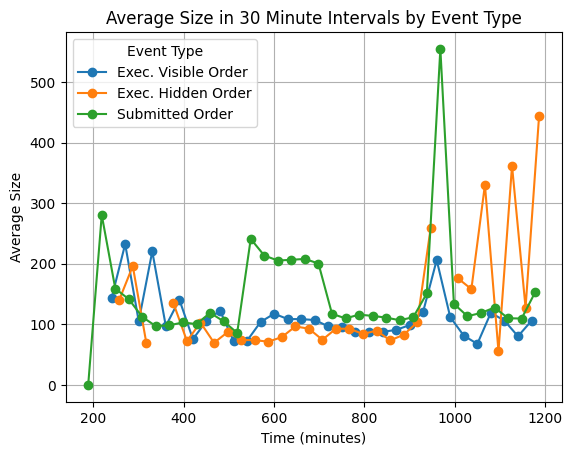

In [89]:
# Separate dataframes for event types 4 and 5
AAPL_M2_execute_vis = AAPL_M2_execute_size[AAPL_M2_execute_size['event_type'] == 4]
AAPL_M2_execute_hid = AAPL_M2_execute_size[AAPL_M2_execute_size['event_type'] == 5]

# Resample the data in 30 minute intervals and calculate the mean size for both event types
r_AAPL_M2_execute_vis = AAPL_M2_execute_vis.resample('30T').mean()
r_AAPL_M2_execute_hid = AAPL_M2_execute_hid.resample('30T').mean()
r_AAPL_M2 = AAPL_M2.resample('30T').mean()

# Plotting the line plots of average size over 30 minute intervals for event types 4 and 5
# plt.figure(figsize=(12, 8))

plt.plot(r_AAPL_M2_execute_vis.index.total_seconds() / 60, r_AAPL_M2_execute_vis['size'], marker='o', label='Exec. Visible Order')
plt.plot(r_AAPL_M2_execute_hid.index.total_seconds() / 60, r_AAPL_M2_execute_hid['size'], marker='o', label='Exec. Hidden Order')
plt.plot(r_AAPL_M2.index.total_seconds() / 60, r_AAPL_M2['size'], marker='o', label='Submitted Order')

plt.xlabel('Time (minutes)')
plt.ylabel('Average Size')
plt.title('Average Size in 30 Minute Intervals by Event Type')
plt.legend(title='Event Type')
plt.grid(True)
plt.show()

In [90]:
# Separate dataframes for event types 4 and 5
AAPL_M3_execute_vis = AAPL_M3[AAPL_M3['event_type'] == 4]
AAPL_M3_execute_hid = AAPL_M3[AAPL_M3['event_type'] == 5]
AAPL_M4_execute_vis = AAPL_M4[AAPL_M4['event_type'] == 4]
AAPL_M4_execute_hid = AAPL_M4[AAPL_M4['event_type'] == 5]

# Resample the data in 30 minute intervals and calculate the mean size for both event types
r_AAPL_M3_execute_vis = AAPL_M3_execute_vis.resample('30T').mean()
r_AAPL_M3_execute_hid = AAPL_M3_execute_hid.resample('30T').mean()
r_AAPL_M4_execute_vis = AAPL_M4_execute_vis.resample('30T').mean()
r_AAPL_M4_execute_hid = AAPL_M4_execute_hid.resample('30T').mean()

/var/folders/lz/7z_hp6dd6q308wv0q5lw0zbr0000gn/T/ipykernel_91132/2484475116.py:8: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  r_AAPL_M3_execute_vis = AAPL_M3_execute_vis.resample('30T').mean()
/var/folders/lz/7z_hp6dd6q308wv0q5lw0zbr0000gn/T/ipykernel_91132/2484475116.py:9: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  r_AAPL_M3_execute_hid = AAPL_M3_execute_hid.resample('30T').mean()
/var/folders/lz/7z_hp6dd6q308wv0q5lw0zbr0000gn/T/ipykernel_91132/2484475116.py:10: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  r_AAPL_M4_execute_vis = AAPL_M4_execute_vis.resample('30T').mean()
/var/folders/lz/7z_hp6dd6q308wv0q5lw0zbr0000gn/T/ipykernel_91132/2484475116.py:11: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  r_AAPL_M4_execute_hid = AAPL_M4_execute_hid.resample('30T').m

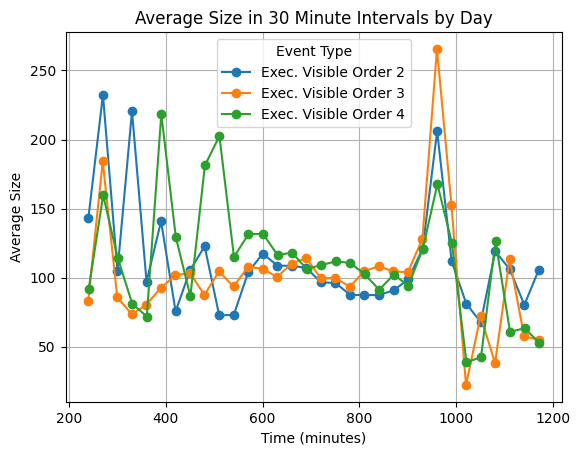

In [91]:
# Plotting the line plots of average size over 30 minute intervals for event types 4 and 5
# plt.figure(figsize=(12, 8))

plt.plot(r_AAPL_M2_execute_vis.index.total_seconds() / 60, r_AAPL_M2_execute_vis['size'], marker='o', label='Exec. Visible Order 2')
plt.plot(r_AAPL_M3_execute_vis.index.total_seconds() / 60, r_AAPL_M3_execute_vis['size'], marker='o', label='Exec. Visible Order 3')
plt.plot(r_AAPL_M4_execute_vis.index.total_seconds() / 60, r_AAPL_M4_execute_vis['size'], marker='o', label='Exec. Visible Order 4')

plt.xlabel('Time (minutes)')
plt.ylabel('Average Size')
plt.title('Average Size in 30 Minute Intervals by Day')
plt.legend(title='Event Type')
plt.grid(True)
plt.show()

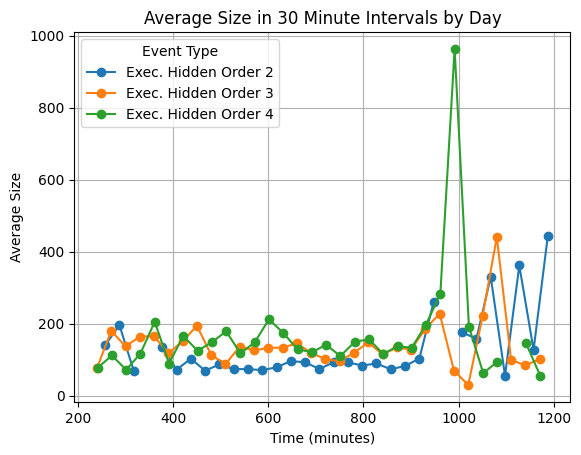

In [92]:
# Plotting the line plots of average size over 30 minute intervals for event types 4 and 5
# plt.figure(figsize=(12, 8))

plt.plot(r_AAPL_M2_execute_hid.index.total_seconds() / 60, r_AAPL_M2_execute_hid['size'], marker='o', label='Exec. Hidden Order 2')
plt.plot(r_AAPL_M3_execute_hid.index.total_seconds() / 60, r_AAPL_M3_execute_hid['size'], marker='o', label='Exec. Hidden Order 3')
plt.plot(r_AAPL_M4_execute_hid.index.total_seconds() / 60, r_AAPL_M4_execute_hid['size'], marker='o', label='Exec. Hidden Order 4')

plt.xlabel('Time (minutes)')
plt.ylabel('Average Size')
plt.title('Average Size in 30 Minute Intervals by Day')
plt.legend(title='Event Type')
plt.grid(True)
plt.show()

Price for direction = 1 and event type 4 or 5.

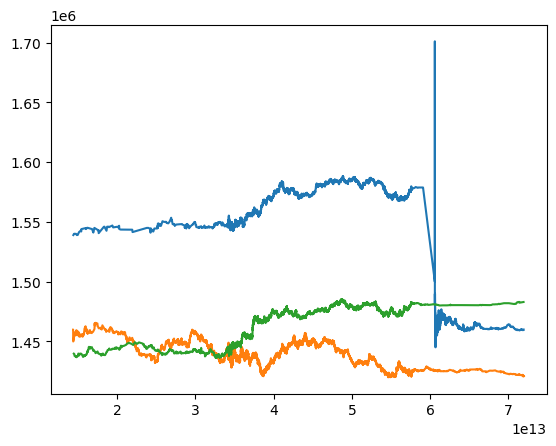

In [93]:
plt.plot(AAPL_M2[(AAPL_M2['direction']==1) & (AAPL_M2['event_type'].isin([4, 5]))]['price'])
plt.plot(AAPL_M3[(AAPL_M3['direction']==1) & (AAPL_M3['event_type'].isin([4, 5]))]['price'])
plt.plot(AAPL_M4[(AAPL_M4['direction']==1) & (AAPL_M4['event_type'].isin([4, 5]))]['price'])

In [94]:
AAPL_M2_best_bid = AAPL_OB2.iloc[:, 0]
AAPL_M2_best_ask = AAPL_OB2.iloc[:, 2]
valid_rows = (AAPL_M2_best_bid != 9999999999) & (AAPL_M2_best_ask != -9999999999)
AAPL_M2_midprice = (AAPL_M2_best_bid[valid_rows] + AAPL_M2_best_ask[valid_rows]) / 2

Look at mid price change intraday, on log scale.

In [95]:
AAPL_M2_midprice_log = np.log(AAPL_M2_midprice)
AAPL_M2_log_midprice_changes = AAPL_M2_midprice_log.diff().dropna()

We only look at price changes that are small - since this makes sure that it is not caused by a market event, rather it is because of market microstructure

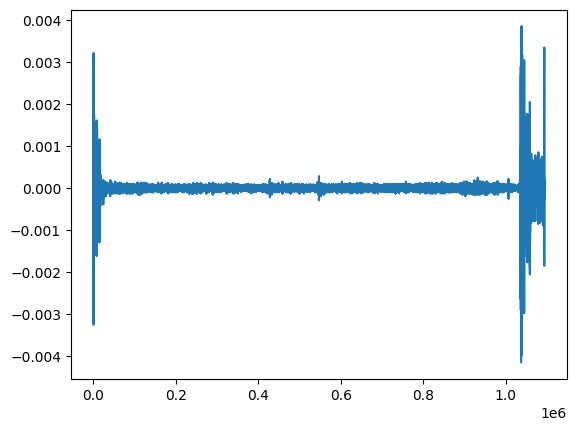

In [96]:
AAPL_M2_log_midprice_changes_q5 = AAPL_M2_log_midprice_changes.quantile(0.05)
AAPL_M2_log_midprice_changes_q95 = AAPL_M2_log_midprice_changes.quantile(0.95)

AAPL_M2_marg_mp_change = AAPL_M2_log_midprice_changes[AAPL_M2_log_midprice_changes.abs() < 0.005]
plt.plot(AAPL_M2_marg_mp_change)

(array([1.00000e+00, 1.00000e+00, 3.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 3.00000e+00, 1.00000e+00, 1.00000e+00,
        0.00000e+00, 2.00000e+00, 2.00000e+00, 0.00000e+00, 3.00000e+00,
        9.00000e+00, 2.00000e+00, 1.20000e+01, 1.00000e+00, 2.50000e+01,
        8.00000e+00, 7.00000e+00, 1.40000e+01, 1.00000e+01, 1.60000e+01,
        2.50000e+01, 1.50000e+01, 3.40000e+01, 5.10000e+01, 5.40000e+01,
        4.50000e+01, 4.50000e+01, 5.90000e+01, 7.50000e+01, 1.11000e+02,
        1.27000e+02, 1.97000e+02, 2.78000e+02, 5.95000e+02, 1.13500e+03,
        9.76600e+03, 1.15851e+05, 9.33200e+03, 1.18300e+03, 5.84000e+02,
        3.02000e+02, 2.00000e+02, 1.37000e+02, 8.50000e+01, 5.80000e+01,
        5.10000e+01, 4.00000e+01, 4.20000e+01, 5.50000e+01, 4.90000e+01,
        3.40000e+01, 1.60000e+01, 2.00000e+01, 1.20000e+01, 1.20000e+01,
        1.60000e+01, 1.00000e+01, 5.00000e+00, 2.60000e+01, 1.00000e+00,
        1.40000e+01, 1.00000e+00, 1.00000e+01, 3.00

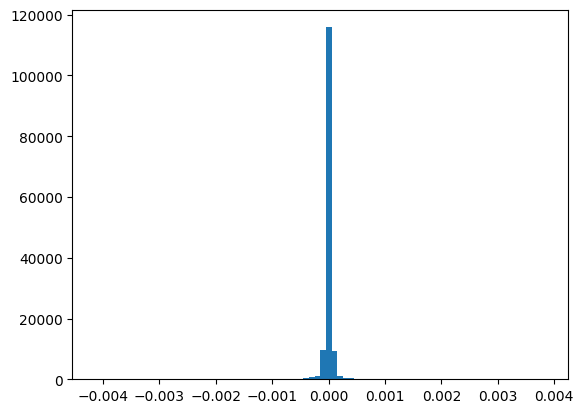

In [97]:
plt.hist(AAPL_M2_marg_mp_change[AAPL_M2_marg_mp_change != 0], bins=80)


In [98]:
AAPL_M2_marg_mp_change[AAPL_M2_marg_mp_change != 0].min()

np.float64(-0.00414328312584189)

In [99]:
# Define the base date
base_date2 = pd.Timestamp('2019-01-02')
base_date3 = pd.Timestamp('2019-01-03')
base_date4 = pd.Timestamp('2019-01-04')

# Add the timedelta (time_sec) to the base date
AAPL_M2.index = base_date2 + AAPL_M2.index
AAPL_M3.index = base_date3 + AAPL_M3.index
AAPL_M4.index = base_date4 + AAPL_M4.index

In [100]:
AAPL_M = pd.concat([AAPL_M2, AAPL_M3, AAPL_M4])

In [101]:
AAPL_OB2.index = AAPL_M2.index
AAPL_OB3.index = AAPL_M3.index
AAPL_OB4.index = AAPL_M4.index

In [102]:
AAPL_OB = pd.concat([AAPL_OB2, AAPL_OB3, AAPL_OB4])

In [103]:
size_5q_ask = AAPL_OB['ask_size_1'].quantile(0.05)
size_95q_ask = AAPL_OB['ask_size_1'].quantile(0.95)
size_5q_bid = AAPL_OB['bid_size_1'].quantile(0.05)
size_95q_bid = AAPL_OB['bid_size_1'].quantile(0.95)

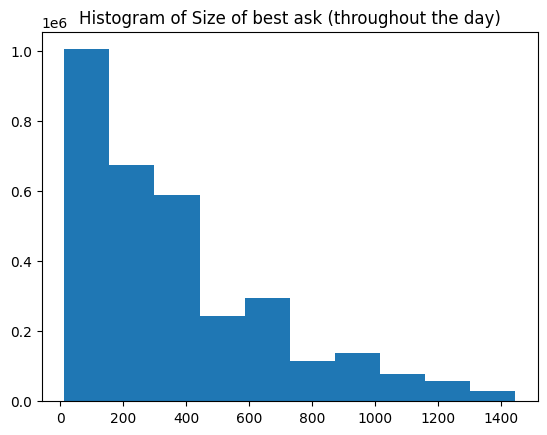

In [104]:
plt.hist(AAPL_OB[(size_5q_ask < AAPL_OB['ask_size_1']) & (AAPL_OB['ask_size_1'] < size_95q_ask)]['ask_size_1'])
plt.title("Histogram of Size of best ask (throughout the day)")
plt.show()

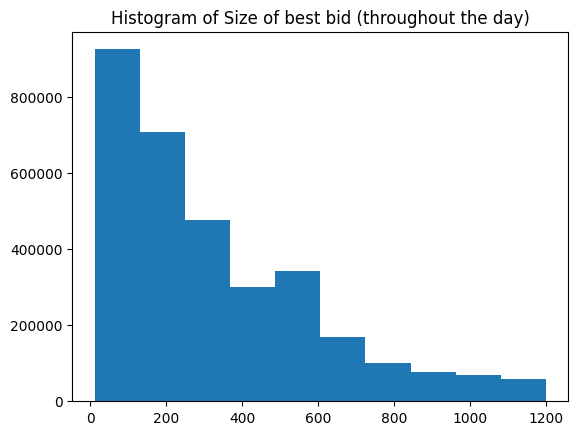

In [105]:
plt.hist(AAPL_OB[(size_5q_bid < AAPL_OB['bid_size_1']) & (AAPL_OB['bid_size_1'] < size_95q_bid)]['bid_size_1'])
plt.title("Histogram of Size of best bid (throughout the day)")
plt.show()

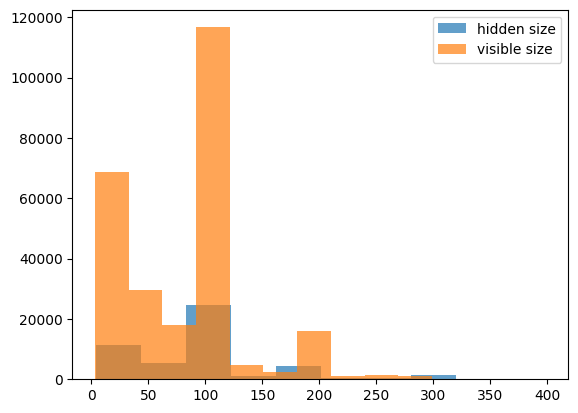

In [116]:
AAPL_M_exec_hid = AAPL_M[AAPL_M['event_type']==5]
size_5q_hid_exec = AAPL_M_exec_hid['size'].quantile(0.05)
size_95q_hid_exec = AAPL_M_exec_hid['size'].quantile(0.95)
AAPL_M_exec_hid_f = AAPL_M_exec_hid[(AAPL_M_exec_hid['size'] > size_5q_hid_exec) & (AAPL_M_exec_hid['size']< size_95q_hid_exec)]

AAPL_M_exec_vis = AAPL_M[AAPL_M['event_type']==4]
size_5q_vis_exec = AAPL_M_exec_vis['size'].quantile(0.05)
size_95q_vis_exec = AAPL_M_exec_vis['size'].quantile(0.95)
AAPL_M_exec_vis_f = AAPL_M_exec_vis[(AAPL_M_exec_vis['size'] > size_5q_vis_exec) & (AAPL_M_exec_vis['size']< size_95q_vis_exec)]

plt.hist(AAPL_M_exec_hid_f['size'],alpha=0.7, label='hidden size')
plt.hist(AAPL_M_exec_vis_f['size'], alpha=0.7, label='visible size')
plt.legend()
plt.show()

In [117]:
AAPL_M_exec = AAPL_M[AAPL_M['event_type'].isin([4, 5])]

In [ ]:
r_AAPL_M2_execute_vis = AAPL_M2_execute_vis.resample('30T').mean()


In [120]:
AAPL_M_exec

,event_type,order_ID,size,price,direction,event_number
time_sec,,,,,,
2019-01-02 04:00:30.483333390,4,115793,100,1538800,-1,34
2019-01-02 04:00:32.577833818,4,118753,400,1539000,1,37
2019-01-02 04:01:50.226889841,4,127061,10,1540000,1,87
2019-01-02 04:03:26.478472054,4,183741,100,1540100,1,167
2019-01-02 04:03:26.527421524,4,166005,100,1540000,1,170
...,...,...,...,...,...,...
2019-01-04 19:49:50.582680484,4,402573065,94,1483100,1,1178078
2019-01-04 19:49:50.582680484,4,402571045,6,1482400,1,1178079
2019-01-04 19:55:39.598893533,4,402579749,200,1483000,-1,1178088


/var/folders/lz/7z_hp6dd6q308wv0q5lw0zbr0000gn/T/ipykernel_91132/1859357946.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resample_AAPL_M_exec_hid = AAPL_M_exec_hid['size'].resample('30T').sum()
/var/folders/lz/7z_hp6dd6q308wv0q5lw0zbr0000gn/T/ipykernel_91132/1859357946.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resample_AAPL_M_exec_vis = AAPL_M_exec_vis['size'].resample('30T').sum()
/var/folders/lz/7z_hp6dd6q308wv0q5lw0zbr0000gn/T/ipykernel_91132/1859357946.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


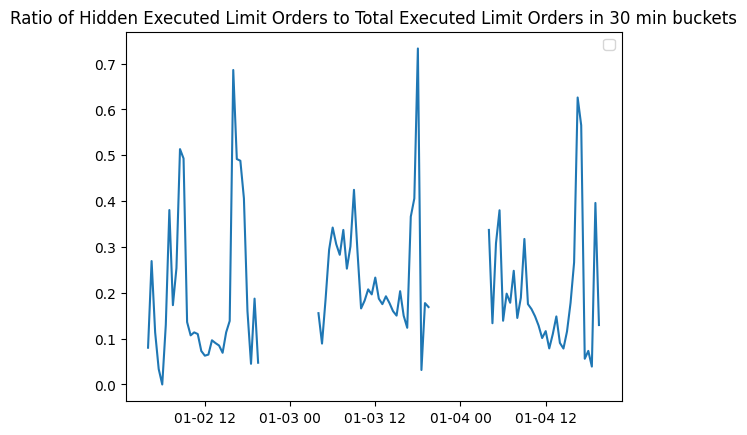

In [129]:
resample_AAPL_M_exec_hid = AAPL_M_exec_hid['size'].resample('30T').sum()
resample_AAPL_M_exec_vis = AAPL_M_exec_vis['size'].resample('30T').sum()
ratio_hid_vis = resample_AAPL_M_exec_hid / (resample_AAPL_M_exec_hid + resample_AAPL_M_exec_vis)

plt.plot(ratio_hid_vis)
plt.legend()
plt.title("Ratio of Hidden Executed Limit Orders to Total Executed Limit Orders in 30 min buckets")
plt.show()

Given a similar pattern from day to day, we can use this as an estimate for the proportion of hidden liquidity if we have a lot more days.

In [149]:
AAPL_M[AAPL_M['event_type']==5]

,event_type,order_ID,size,price,direction,event_number
time_sec,,,,,,
2019-01-02 04:17:19.732863546,5,0,490,1542000,1,499
2019-01-02 04:29:53.633379093,5,0,10,1545100,1,852
2019-01-02 04:43:03.232851089,5,0,13,1541100,1,1189
2019-01-02 04:45:16.754005463,5,0,48,1545000,1,1208
2019-01-02 04:53:38.596146453,5,0,25,1543100,1,1369
...,...,...,...,...,...,...
2019-01-04 19:07:57.518277607,5,0,11,1481300,1,1177964
2019-01-04 19:40:00.976562784,5,0,25,1481500,1,1178035
2019-01-04 19:45:07.661597693,5,0,100,1482800,1,1178059


In [187]:
AAPL_M.iloc[23715:23717]

,event_type,order_ID,size,price,direction,event_number
time_sec,,,,,,
2019-01-02 09:31:31.189235939,3,11804233,100,1555300,-1,23715
2019-01-02 09:31:31.211264802,5,0,4,1554900,1,23716


In [188]:
pd.set_option('display.max_columns', None)
AAPL_OB.iloc[23715:23717]


,ask_price_1,ask_size_1,bid_price_1,bid_size_1,ask_price_2,ask_size_2,bid_price_2,bid_size_2,ask_price_3,ask_size_3,bid_price_3,bid_size_3,ask_price_4,ask_size_4,bid_price_4,bid_size_4,ask_price_5,ask_size_5,bid_price_5,bid_size_5,ask_price_6,ask_size_6,bid_price_6,bid_size_6,ask_price_7,ask_size_7,bid_price_7,bid_size_7,ask_price_8,ask_size_8,bid_price_8,bid_size_8,ask_price_9,ask_size_9,bid_price_9,bid_size_9,ask_price_10,ask_size_10,bid_price_10,bid_size_10
time_sec,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-02 09:31:31.189235939,1555300,103,1554500,500,1555400,102,1554400,700,1555500,599,1554300,600,1555600,500,1554200,600,1555700,710,1554100,300,1555800,600,1554000,700,1555900,350,1553900,438,1556000,500,1553800,600,1556100,132,1553600,770,1556300,100,1553400,100
2019-01-02 09:31:31.211264802,1555300,103,1554500,500,1555400,102,1554400,700,1555500,599,1554300,600,1555600,500,1554200,600,1555700,710,1554100,300,1555800,600,1554000,700,1555900,350,1553900,438,1556000,500,1553800,600,1556100,132,1553600,770,1556300,100,1553400,100


In [196]:
merged_AAPL_M_exec_hid

,event_type,order_ID,size,price,direction,event_number,bid_price_1
time_sec,,,,,,,
2019-01-02 04:17:19.732863546,5,0,490,1542000,1,499,1540000
2019-01-02 04:17:19.732863546,5,0,490,1542000,1,499,1540000
2019-01-02 04:17:19.732863546,5,0,490,1542000,1,499,1544000
2019-01-02 04:29:53.633379093,5,0,10,1545100,1,852,1545000
2019-01-02 04:43:03.232851089,5,0,13,1541100,1,1189,1540300
...,...,...,...,...,...,...,...
2019-01-04 19:07:57.518277607,5,0,11,1481300,1,1177964,1480500
2019-01-04 19:40:00.976562784,5,0,25,1481500,1,1178035,1481300
2019-01-04 19:45:07.661597693,5,0,100,1482800,1,1178059,1481800
